In [8]:
from langgraph.graph import StateGraph, START, END 
from langchain_openai import ChatOpenAI
from typing import TypedDict
from dotenv import load_dotenv

# Load environment variables
load_dotenv()
MODEL = "gpt-4.1-mini"
TEMPERATURE = 0

In [9]:
# define state

class BMIState(TypedDict):
    question: str # question to ask the llm
    answer: str  # llm's answer

In [10]:
# define functions

def question_llm(state: BMIState) -> BMIState:

    question = state['question']

    llm = ChatOpenAI(
            model=MODEL, 
            temperature=TEMPERATURE
            )
    
    prompt = f"Answer the following question: {question}"
    
    llm_response = llm.invoke(prompt).content

    state['answer'] = llm_response
    
    return state


In [11]:
# define graph

graph = StateGraph(BMIState)

# add notes
graph.add_node("ask_llm", question_llm)

# add edges
graph.add_edge(START, "ask_llm")
graph.add_edge("ask_llm", END)

# compile graph
workflow = graph.compile()

# execute graph
question = "What is the capital of Pakistan?"
initial_state = {"question": question}
final_state = workflow.invoke(initial_state)

In [12]:
final_state

{'question': 'What is the capital of Pakistan?',
 'answer': 'The capital of Pakistan is Islamabad.'}

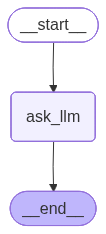

In [7]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())